Dataset :
  - https://www.sciencedirect.com/science/article/abs/pii/S0306261924015708
  - https://github.com/wangbobby1026/PVF-Dataset

# 0. Environment

## Packages

Packages à installer
- jupyterlab
- pandas
- scikit-image
- matplotlib
- seaborn
- opencv-python

## Imports

In [1]:
import logging
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


## Configuration

In [2]:
DATASET_PATH = "../../02 - Datasets/PVF-10"
FORMAT = "110x60"

DATA_PATH = Path(DATASET_PATH) / f"PVF_10_{FORMAT}"

DATAFILE_NAME = f"modules_{FORMAT}_statistical_data.csv"

## Logging

Pour afficher les messages de log dans les cellules de résultat.

In [3]:
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# 1. Chargement du jeu de données

In [4]:
df = pd.read_csv(Path(DATA_PATH) / DATAFILE_NAME, index_col="id")

display(df)

,status,format,original_split,mean,median,max,std,min,p_0.05,p_0.10,...,hist_246,hist_247,hist_248,hist_249,hist_250,hist_251,hist_252,hist_253,hist_254,hist_255
id,,,,,,,,,,,,,,,,,,,,,
DJI_20230228122654_0466_T_000001,substring open circuit,110x60,test,192.039394,189.0,239,22.338687,22,166.0,169.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228122803_0500_T_000001,substring open circuit,110x60,test,126.448939,125.0,191,31.455054,32,78.0,87.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123425_0666_T_000002,substring open circuit,110x60,test,155.861212,158.0,245,37.759745,30,85.0,102.9,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228124402_0129_T_000002,substring open circuit,110x60,test,145.170606,143.0,242,48.027035,31,65.0,74.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228124624_0220_T_000001,substring open circuit,110x60,test,155.635303,153.0,236,36.950789,7,92.0,105.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DJI_20231121165445_0658_T_000004,healthy panel,110x60,train,65.149848,65.0,102,6.115316,13,58.0,59.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20231121165536_0682_T_000002,healthy panel,110x60,train,117.266970,117.0,161,11.372492,38,97.0,101.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20231121165610_0698_T_000002,healthy panel,110x60,train,111.709545,112.0,137,10.205882,55,97.0,99.0,...,0,0,0,0,0,0,0,0,0,0


# 2. Préparation

## Suppression des colonnes inutiles

### Colonnes catégorielles

In [5]:
df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
Index: 5345 entries, DJI_20230228122654_0466_T_000001 to DJI_20231121170238_0094_T_000002
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   status          5345 non-null   object
 1   format          5345 non-null   object
 2   original_split  5345 non-null   object
dtypes: object(3)
memory usage: 296.1+ KB


'status' est la colonne cible.

Les autres colonnes 'format' et 'original_split' sont à supprimer.


In [6]:
df = df.drop(columns=['format', 'original_split'])

### Colonnes numériques

On cherche les colonnes numériques du dataframe dont l'écart-type est nul.

In [7]:
zero_std_df = df.describe().loc[:, df.describe().loc["std"] < 0.001]
zero_std_df

,size,hist_251,hist_252,hist_253,hist_254,hist_255
count,5345.0,5345.0,5345.0,5345.0,5345.0,5345.0
mean,6600.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,6600.0,0.0,0.0,0.0,0.0,0.0
25%,6600.0,0.0,0.0,0.0,0.0,0.0
50%,6600.0,0.0,0.0,0.0,0.0,0.0
75%,6600.0,0.0,0.0,0.0,0.0,0.0
max,6600.0,0.0,0.0,0.0,0.0,0.0


Ces colonnes n'apportent aucune information. On peut les supprimer.

In [8]:
cols_to_drop = [col for col in zero_std_df.columns]
df = df.drop(columns=cols_to_drop)

### Doublons

On cherche les doublons apparaissant dans le jeu de données

In [9]:
df[df.duplicated(keep=False)].sort_values("mean")

,status,mean,median,max,std,min,p_0.05,p_0.10,p_0.15,p_0.20,...,hist_241,hist_242,hist_243,hist_244,hist_245,hist_246,hist_247,hist_248,hist_249,hist_250
id,,,,,,,,,,,,,,,,,,,,,
DJI_20230228123317_0638_T_000005,healthy panel,81.351364,79.0,144,21.788293,40,49.0,51.0,56.0,61.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123317_0638_T_000002,healthy panel,81.351364,79.0,144,21.788293,40,49.0,51.0,56.0,61.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123317_0638_T_000003,healthy panel,136.745000,143.0,177,19.617462,77,98.0,105.0,113.0,119.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123317_0638_T_000006,healthy panel,136.745000,143.0,177,19.617462,77,98.0,105.0,113.0,119.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123317_0638_T_000004,substring open circuit,145.375909,143.0,227,38.276942,68,90.0,99.0,102.0,107.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123317_0638_T_000001,substring open circuit,145.375909,143.0,227,38.276942,68,90.0,99.0,102.0,107.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230227163409_0290_T_000003,healthy panel,195.552273,198.0,211,13.283802,28,187.0,193.0,195.0,195.8,...,0,0,0,0,0,0,0,0,0,0
DJI_20230227163409_0290_T_000007,healthy panel,195.552273,198.0,211,13.283802,28,187.0,193.0,195.0,195.8,...,0,0,0,0,0,0,0,0,0,0
DJI_20230227163409_0290_T_000008,healthy panel,201.437121,204.0,219,10.916542,51,193.0,197.0,199.0,201.0,...,0,0,0,0,0,0,0,0,0,0


14 lignes, soit 7 modules, apparaissent en doublon dans le jeu de données. Il faut les supprimer.

In [10]:
df = df.drop_duplicates()

display(df)

,status,mean,median,max,std,min,p_0.05,p_0.10,p_0.15,p_0.20,...,hist_241,hist_242,hist_243,hist_244,hist_245,hist_246,hist_247,hist_248,hist_249,hist_250
id,,,,,,,,,,,,,,,,,,,,,
DJI_20230228122654_0466_T_000001,substring open circuit,192.039394,189.0,239,22.338687,22,166.0,169.0,173.00,175.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228122803_0500_T_000001,substring open circuit,126.448939,125.0,191,31.455054,32,78.0,87.0,93.00,100.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20230228123425_0666_T_000002,substring open circuit,155.861212,158.0,245,37.759745,30,85.0,102.9,114.00,125.0,...,5,2,3,1,1,0,0,0,0,0
DJI_20230228124402_0129_T_000002,substring open circuit,145.170606,143.0,242,48.027035,31,65.0,74.0,91.00,106.0,...,0,1,0,0,0,0,0,0,0,0
DJI_20230228124624_0220_T_000001,substring open circuit,155.635303,153.0,236,36.950789,7,92.0,105.0,117.00,129.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DJI_20231121165445_0658_T_000004,healthy panel,65.149848,65.0,102,6.115316,13,58.0,59.0,60.00,60.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20231121165536_0682_T_000002,healthy panel,117.266970,117.0,161,11.372492,38,97.0,101.0,108.85,111.0,...,0,0,0,0,0,0,0,0,0,0
DJI_20231121165610_0698_T_000002,healthy panel,111.709545,112.0,137,10.205882,55,97.0,99.0,101.00,103.0,...,0,0,0,0,0,0,0,0,0,0


## Fonction permettant d'extraire des jeux train/validation/test

... en respectant les proportions initiales de la colonne cible du dataset.

In [11]:
from collections import namedtuple

Splits = namedtuple("Splits", "X_train X_test X_validation y_train y_test y_validation")

def improved_train_test_validation_split(data: pd.DataFrame, 
                                         target_col: str,
                                         train_size: float,
                                         test_size: float, 
                                         validation_size: float, 
                                         **kwargs):
    """Split the dataset into train, test (and validation) respecting original 'cat_col' ratios in each"""

    total_size = train_size + test_size + validation_size
    if abs(total_size - 1.0) > 0.001:
        raise ValueError(f"Sum of (train_size, test_size, validation_size) must be 1.0 (currently {total_size}).")

    features = data.drop(columns=[target_col])
    target = data[target_col]

    cat_vals = data[target_col].unique()

    splits = {}

    for cat_val in cat_vals:
        selection_mask = data[target_col] == cat_val

        if validation_size > 0.:
            X_remain, X_validation, y_remain, y_validation = train_test_split(features.loc[selection_mask, :], target[selection_mask], test_size=validation_size, **kwargs)
            new_train_size = train_size / (train_size + test_size)
        else:
            X_validation = pd.DataFrame()
            y_validation = pd.Series()
            X_remain = features.loc[selection_mask, :]
            y_remain = target[selection_mask]
            new_train_size = train_size
            
        X_train, X_test, y_train, y_test = train_test_split(X_remain, y_remain, train_size=new_train_size, **kwargs)

        splits[cat_val] = X_train, X_test, X_validation, y_train, y_test, y_validation

    X_train_full, X_test_full, X_validation_full, y_train_full, y_test_full, y_validation_full = [pd.concat(splits_tuple, axis=0) 
                                                                                                  for splits_tuple in zip(*splits.values())]

    return Splits(X_train_full, X_test_full, X_validation_full, y_train_full, y_test_full, y_validation_full)


In [12]:
# splits = improved_train_test_validation_split(df, target_col="status", validation_size=0.15, test_size=0.15, train_size=0.7)
splits = improved_train_test_validation_split(df, target_col="status", validation_size=0., test_size=0.2, train_size=0.8)

In [13]:
total_elements = sum([len(split) for split_name, split in zip(splits._fields, splits) if split_name.startswith("y")])

for split_name, split in zip(splits._fields, splits):
    if not split_name.startswith("y"):
        continue
    print("---------------------------------")
    print(f"Split: {split_name}\n")
    nb_elements = len(split)
    print(f"Nombre d'éléments: {nb_elements}")
    print(f"Proportion du jeu complet: {nb_elements/total_elements*100:.2f}%")
    if not split.empty:
        display(pd.Series(split).value_counts())


---------------------------------
Split: y_train

Nombre d'éléments: 4267
Proportion du jeu complet: 79.94%


status
healthy panel             1164
hot cell                   676
junction box heat          640
substring open circuit     475
short circuit panel        341
bottom dirt                301
Debris cover               268
shadow                     242
break                      104
string short circuit        56
Name: count, dtype: int64

---------------------------------
Split: y_test

Nombre d'éléments: 1071
Proportion du jeu complet: 20.06%


status
healthy panel             292
hot cell                  169
junction box heat         160
substring open circuit    119
short circuit panel        86
bottom dirt                76
Debris cover               67
shadow                     61
break                      26
string short circuit       15
Name: count, dtype: int64

---------------------------------
Split: y_validation

Nombre d'éléments: 0
Proportion du jeu complet: 0.00%


In [14]:
if len(splits) == 6:
    X_train, X_test, X_validation, y_train, y_test, y_validation = splits
else:
    X_train, X_test, y_train, y_test = splits

# 3. Evaluation de modèles ML

## Fonctions communes

In [15]:
import time

# Fonction GridSearch

def search(classifier, parameters: dict, scale:bool = False):

    start = time.time()

    if scale:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Création du modèle avec cette grille de paramètres
    grid_model = GridSearchCV(classifier, parameters, verbose=2, n_jobs=-1)

    # Entraînement du modèle
    print("Entraînement en cours...")
    grid_model.fit(X_train_scaled, y_train)

    end = time.time()
    print(f"Temps nécessaire : {(end - start)/60:.2f} minutes")

    # Meilleurs paramètres
    print(f"Meilleurs paramètres: {grid_model.best_params_}")

    # Accuracy
    test_score = grid_model.score(X_test_scaled, y_test)
    print(f"Accuracy (test dataset): {test_score}")

    # Classes
    classes = grid_model.classes_

    # Calcul des prévisions sur le jeu de test
    y_pred = grid_model.predict(X_test_scaled)

    return grid_model, classes, y_pred, test_score


In [16]:
# Affichage de la matrice de confusion

def plot_confusion_matrix(y_test, y_pred, classes):

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", yticklabels=classes, xticklabels=classes)
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies classes")
    plt.title("Matrice de confusion")
    plt.show()

In [17]:
# Stockage des résultats

results = {}

## SVM

### Entraînement

In [18]:
from sklearn.svm import SVC

# Grille de paramètres pour GridSearchCV
parameters = {
    "C": [0.1,1,10],
    "kernel": ["rbf", "linear", "poly"],
    "gamma": ["scale", 0.001, 0.1, 0.5],
    "class_weight": ["balanced", None]
}

# Création du modèle avec cette grille de paramètres
clf = SVC()
model_name = "SVM"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=True)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Temps nécessaire : 2.30 minutes
Meilleurs paramètres: {'C': 10, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy (test dataset): 0.6844070961718021


### Evaluation

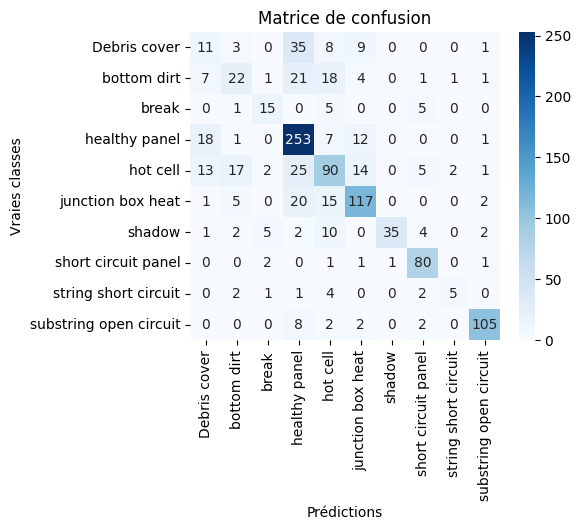

In [19]:
plot_confusion_matrix(y_test, y_pred, classes)

In [20]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.22      0.16      0.19        67
           bottom dirt       0.42      0.29      0.34        76
                 break       0.58      0.58      0.58        26
         healthy panel       0.69      0.87      0.77       292
              hot cell       0.56      0.53      0.55       169
     junction box heat       0.74      0.73      0.73       160
                shadow       0.97      0.57      0.72        61
   short circuit panel       0.81      0.93      0.86        86
  string short circuit       0.62      0.33      0.43        15
substring open circuit       0.92      0.88      0.90       119

              accuracy                           0.68      1071
             macro avg       0.65      0.59      0.61      1071
          weighted avg       0.68      0.68      0.67      1071



## KNN

### Entraînement

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Grille de paramètres pour GridSearchCV
parameters = {
    "n_neighbors":np.arange(2, 20),
    "metric": ["minkowski", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
}

# Création du modèle avec cette grille de paramètres
clf = KNeighborsClassifier()
model_name = "KNN"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=False)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Temps nécessaire : 3.29 minutes
Meilleurs paramètres: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': np.int64(12), 'weights': 'distance'}
Accuracy (test dataset): 0.5518207282913166


### Evaluation

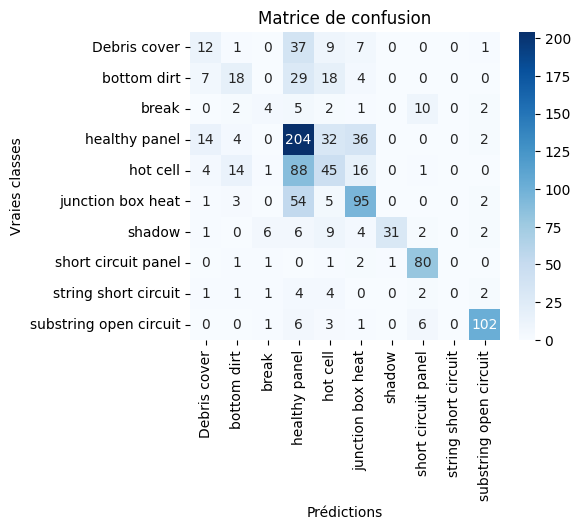

In [22]:
plot_confusion_matrix(y_test, y_pred, classes)

In [23]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.30      0.18      0.22        67
           bottom dirt       0.41      0.24      0.30        76
                 break       0.29      0.15      0.20        26
         healthy panel       0.47      0.70      0.56       292
              hot cell       0.35      0.27      0.30       169
     junction box heat       0.57      0.59      0.58       160
                shadow       0.97      0.51      0.67        61
   short circuit panel       0.79      0.93      0.86        86
  string short circuit       0.00      0.00      0.00        15
substring open circuit       0.90      0.86      0.88       119

              accuracy                           0.55      1071
             macro avg       0.51      0.44      0.46      1071
          weighted avg       0.54      0.55      0.53      1071



e:\Miniconda3\envs\DataScientist_Projet\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Miniconda3\envs\DataScientist_Projet\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Miniconda3\envs\DataScientist_Projet\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

## Decision Trees

### Entraînement

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Grille de paramètres pour GridSearchCV
parameters = {
    "max_depth":np.arange(2, 20),
    "criterion": ["entropy", "gini", "log_loss"],
}

# Création du modèle avec cette grille de paramètres
clf = DecisionTreeClassifier()
model_name = "DecisionTree"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=False)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Temps nécessaire : 0.22 minutes
Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': np.int64(9)}
Accuracy (test dataset): 0.676937441643324


In [25]:
best_dtc = grid_model.best_estimator_

feats = dict(zip(df.columns, best_dtc.feature_importances_))

feats_importances = pd.DataFrame.from_dict(feats, orient="index")

feats_importances = feats_importances.rename(columns={0: "Importance"})
feats_importances = feats_importances.sort_values(by="Importance", ascending=False)

feats_importances.head(10)

,Importance
median,0.238838
max,0.104378
hist_217,0.077694
p_0.75,0.042777
p_0.55,0.027677
p_0.85,0.023747
p_0.50,0.018456
hist_196,0.016353
p_0.80,0.016165
hist_175,0.012461


### Evaluation

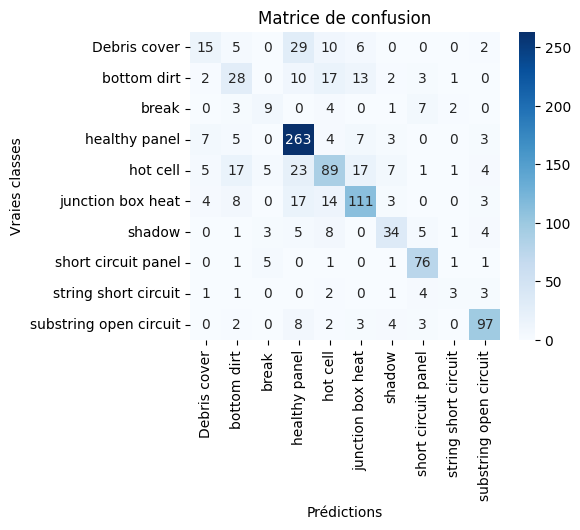

In [26]:
plot_confusion_matrix(y_test, y_pred, classes)

In [27]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.44      0.22      0.30        67
           bottom dirt       0.39      0.37      0.38        76
                 break       0.41      0.35      0.38        26
         healthy panel       0.74      0.90      0.81       292
              hot cell       0.59      0.53      0.56       169
     junction box heat       0.71      0.69      0.70       160
                shadow       0.61      0.56      0.58        61
   short circuit panel       0.77      0.88      0.82        86
  string short circuit       0.33      0.20      0.25        15
substring open circuit       0.83      0.82      0.82       119

              accuracy                           0.68      1071
             macro avg       0.58      0.55      0.56      1071
          weighted avg       0.66      0.68      0.66      1071



## Boosting

### Entraînement

In [28]:
from sklearn.ensemble import AdaBoostClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

# Grille de paramètres pour GridSearchCV
parameters = {
    "n_estimators": np.arange(10, 210, 10),
    "learning_rate": [0.01, 0.1, 1., 10.],
    "estimator": [dtc, best_dtc],
    # "n_estimators": [10],
    # "learning_rate": [1.],
}

# Création du modèle avec cette grille de paramètres
clf = AdaBoostClassifier()
model_name = "Boosting"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=False)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Temps nécessaire : 55.75 minutes
Meilleurs paramètres: {'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(9)), 'learning_rate': 1.0, 'n_estimators': np.int64(190)}
Accuracy (test dataset): 0.7619047619047619


### Evaluation

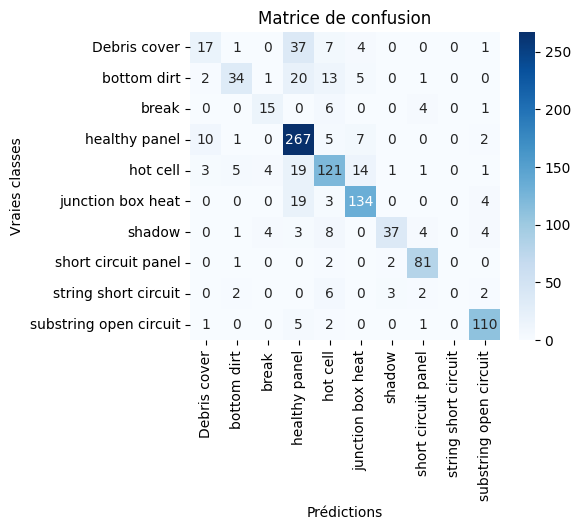

In [29]:
plot_confusion_matrix(y_test, y_pred, classes)

In [30]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.52      0.25      0.34        67
           bottom dirt       0.76      0.45      0.56        76
                 break       0.62      0.58      0.60        26
         healthy panel       0.72      0.91      0.81       292
              hot cell       0.70      0.72      0.71       169
     junction box heat       0.82      0.84      0.83       160
                shadow       0.86      0.61      0.71        61
   short circuit panel       0.86      0.94      0.90        86
  string short circuit       0.00      0.00      0.00        15
substring open circuit       0.88      0.92      0.90       119

              accuracy                           0.76      1071
             macro avg       0.67      0.62      0.64      1071
          weighted avg       0.75      0.76      0.74      1071



e:\Miniconda3\envs\DataScientist_Projet\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Miniconda3\envs\DataScientist_Projet\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Miniconda3\envs\DataScientist_Projet\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

## Bagging

### Entraînement

In [31]:
from sklearn.ensemble import BaggingClassifier

dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

# Grille de paramètres pour GridSearchCV
parameters = {
    "n_estimators": np.arange(100, 500, 100),
    "estimator": [dtc, best_dtc],
    # "n_estimators": [10],
}

# Création du modèle avec cette grille de paramètres
clf = BaggingClassifier()
model_name = "Bagging"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=False)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Temps nécessaire : 6.72 minutes
Meilleurs paramètres: {'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=np.int64(9)), 'n_estimators': np.int64(300)}
Accuracy (test dataset): 0.7600373482726424


### Evaluation

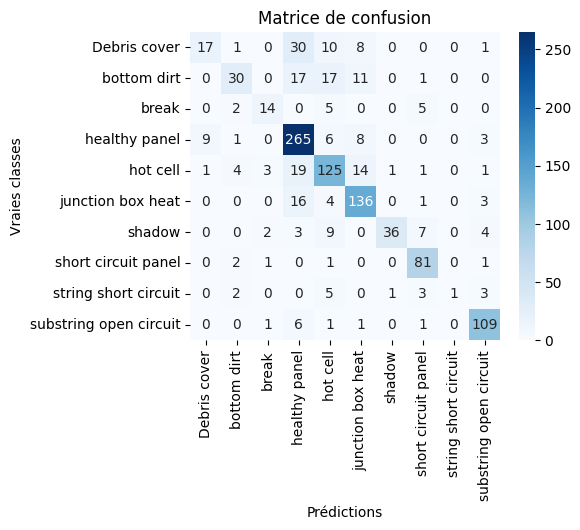

In [32]:
plot_confusion_matrix(y_test, y_pred, classes)

In [33]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.63      0.25      0.36        67
           bottom dirt       0.71      0.39      0.51        76
                 break       0.67      0.54      0.60        26
         healthy panel       0.74      0.91      0.82       292
              hot cell       0.68      0.74      0.71       169
     junction box heat       0.76      0.85      0.80       160
                shadow       0.95      0.59      0.73        61
   short circuit panel       0.81      0.94      0.87        86
  string short circuit       1.00      0.07      0.12        15
substring open circuit       0.87      0.92      0.89       119

              accuracy                           0.76      1071
             macro avg       0.78      0.62      0.64      1071
          weighted avg       0.76      0.76      0.74      1071



## Random Forest

### Entraînement

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Grille de paramètres pour GridSearchCV
parameters = {
    "n_estimators": np.arange(10, 100, 10),
    "criterion": ["entropy", "gini", "log_loss"],
    "max_depth":np.arange(2, 20),
}

# Création du modèle avec cette grille de paramètres
clf = RandomForestClassifier(n_jobs=-1)
model_name = "RandomForest"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=False)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Temps nécessaire : 4.63 minutes
Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': np.int64(18), 'n_estimators': np.int64(80)}
Accuracy (test dataset): 0.7591036414565826


### Evaluation

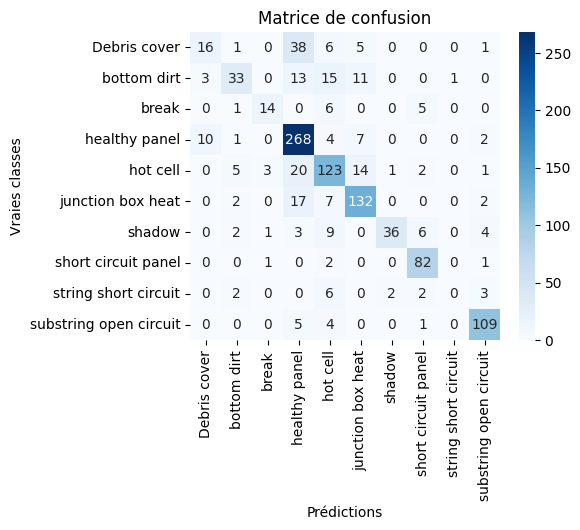

In [35]:
plot_confusion_matrix(y_test, y_pred, classes)

In [36]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.55      0.24      0.33        67
           bottom dirt       0.70      0.43      0.54        76
                 break       0.74      0.54      0.62        26
         healthy panel       0.74      0.92      0.82       292
              hot cell       0.68      0.73      0.70       169
     junction box heat       0.78      0.82      0.80       160
                shadow       0.92      0.59      0.72        61
   short circuit panel       0.84      0.95      0.89        86
  string short circuit       0.00      0.00      0.00        15
substring open circuit       0.89      0.92      0.90       119

              accuracy                           0.76      1071
             macro avg       0.68      0.61      0.63      1071
          weighted avg       0.74      0.76      0.74      1071



## MLP - Multi-layer Perceptrons

### Entraînement

In [37]:
from sklearn.neural_network import MLPClassifier

# Grille de paramètres pour GridSearchCV
parameters = {
    'hidden_layer_sizes': [
        # (10,),
        (50,),
        (100,),
        # (10, 10),
        (50, 50),
        (100, 100),
        # (10, 10, 10),
        (50, 50, 50),
        (100, 100, 100),
        ],
    # 'solver': ["adam", "lbfgs", "sgd"],
    'solver': ["lbfgs"],
    "activation": ["logistic", "tanh", "relu"],
    }

# Création du modèle avec cette grille de paramètres
clf = MLPClassifier(max_iter=10000, alpha=0.0001, early_stopping=True)
model_name = "MLP"

grid_model, classes, y_pred, test_score = search(classifier=clf, 
                                          parameters=parameters, 
                                          scale=True)

results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Temps nécessaire : 1.43 minutes
Meilleurs paramètres: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'solver': 'lbfgs'}
Accuracy (test dataset): 0.6498599439775911


### Evaluation

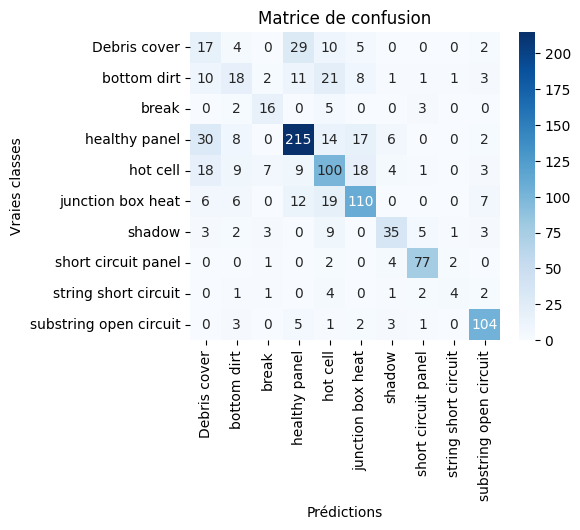

In [38]:
plot_confusion_matrix(y_test, y_pred, classes)

In [39]:
# Générer le rapport de classification
class_report = classification_report(y_test, y_pred, target_names=classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

          Debris cover       0.20      0.25      0.23        67
           bottom dirt       0.34      0.24      0.28        76
                 break       0.53      0.62      0.57        26
         healthy panel       0.77      0.74      0.75       292
              hot cell       0.54      0.59      0.56       169
     junction box heat       0.69      0.69      0.69       160
                shadow       0.65      0.57      0.61        61
   short circuit panel       0.86      0.90      0.88        86
  string short circuit       0.50      0.27      0.35        15
substring open circuit       0.83      0.87      0.85       119

              accuracy                           0.65      1071
             macro avg       0.59      0.57      0.58      1071
          weighted avg       0.65      0.65      0.65      1071



## XGBoost

### Adaptation de la fonction `search`

In [40]:
# Fonction GridSearch pour XGBoost

def search_xgboost(classifier, parameters: dict, scale:bool = False):

    start = time.time()

    if scale:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test

    # Classes
    xgboost_classes = {v: str(i) for i, v in enumerate(y_train.unique())}

    # Conversion de la target (variable catégorielle) en vecteur numérique
    y_train_xgboost = y_train.replace(xgboost_classes).astype(int)
    y_test_xgboost = y_test.replace(xgboost_classes).astype(int)

    # Création du modèle avec cette grille de paramètres
    grid_model = GridSearchCV(classifier, parameters, verbose=2, n_jobs=1)

    # Entraînement du modèle
    print("Entraînement en cours...")
    grid_model.fit(X_train_scaled, y_train_xgboost, eval_set=[(X_test_scaled, y_test_xgboost)])

    end = time.time()
    print(f"Temps nécessaire : {(end - start)/60:.2f} minutes")

    # Meilleurs paramètres
    print(f"Meilleurs paramètres: {grid_model.best_params_}")

    # Accuracy
    test_score = grid_model.score(X_test_scaled, y_test_xgboost)
    print(f"Accuracy (test dataset): {test_score}")

    # Calcul des prévisions sur le jeu de test
    y_pred = grid_model.predict(X_test_scaled)

    return grid_model, xgboost_classes, y_pred, test_score


### Entraînement

In [41]:
import xgboost as xgb

# Grille de paramètres pour GridSearchCV
parameters = {
    "n_estimators": np.arange(100, 400, 100),
    "learning_rate": [0.01, 0.1, 0.3],
    "max_depth": np.arange(4, 8, 1),
    # "n_estimators": [200],
    # "learning_rate": [0.1],
    # "max_depth": [6],
}

# Création du modèle avec cette grille de paramètres
clf = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=10, n_jobs=None, verbosity=0)
model_name = "XGBoost"

grid_model, xgboost_classes, y_pred, test_score = search_xgboost(classifier=clf, 
                                                                 parameters=parameters, 
                                                                 scale=True)
results[model_name] = {
    "train": grid_model.best_score_,
    "test": test_score,
    }

Entraînement en cours...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[0]	validation_0-mlogloss:2.28188
[1]	validation_0-mlogloss:2.26202
[2]	validation_0-mlogloss:2.24279
[3]	validation_0-mlogloss:2.22424
[4]	validation_0-mlogloss:2.20583
[5]	validation_0-mlogloss:2.18845
[6]	validation_0-mlogloss:2.17132
[7]	validation_0-mlogloss:2.15501
[8]	validation_0-mlogloss:2.13894
[9]	validation_0-mlogloss:2.12298
[10]	validation_0-mlogloss:2.10759
[11]	validation_0-mlogloss:2.09262
[12]	validation_0-mlogloss:2.07795
[13]	validation_0-mlogloss:2.06355
[14]	validation_0-mlogloss:2.04958
[15]	validation_0-mlogloss:2.03601
[16]	validation_0-mlogloss:2.02253
[17]	validation_0-mlogloss:2.00942
[18]	validation_0-mlogloss:1.99664
[19]	validation_0-mlogloss:1.98419
[20]	validation_0-mlogloss:1.97202
[21]	validation_0-mlogloss:1.95981
[22]	validation_0-mlogloss:1.94787
[23]	validation_0-mlogloss:1.93598
[24]	validation_0-mlogloss:1.92443
[25]	validation_0-mlogloss:1.91290
[26]	validati

### Evaluation

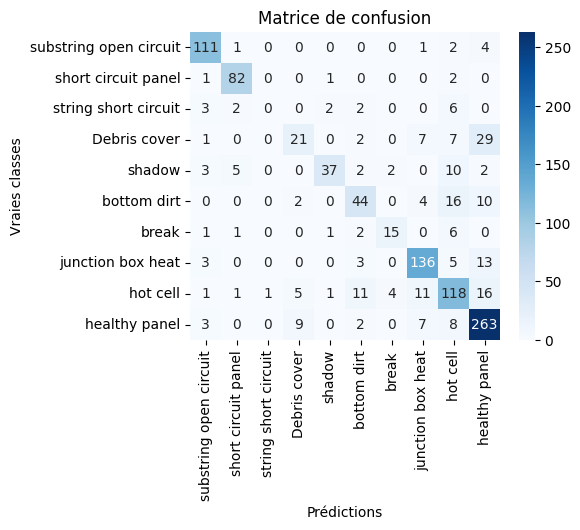

In [42]:
plot_confusion_matrix(y_test.replace(xgboost_classes).astype(int), y_pred, xgboost_classes)

In [43]:
# Générer le rapport de classification
class_report = classification_report(y_test.replace(xgboost_classes).astype(int), y_pred, target_names=xgboost_classes)

# Afficher le rapport
print("Rapport de classification :\n", class_report)

Rapport de classification :
                         precision    recall  f1-score   support

substring open circuit       0.87      0.93      0.90       119
   short circuit panel       0.89      0.95      0.92        86
  string short circuit       0.00      0.00      0.00        15
          Debris cover       0.57      0.31      0.40        67
                shadow       0.88      0.61      0.72        61
           bottom dirt       0.65      0.58      0.61        76
                 break       0.71      0.58      0.64        26
     junction box heat       0.82      0.85      0.83       160
              hot cell       0.66      0.70      0.68       169
         healthy panel       0.78      0.90      0.84       292

              accuracy                           0.77      1071
             macro avg       0.68      0.64      0.65      1071
          weighted avg       0.76      0.77      0.76      1071



## Bilan

In [44]:
results_df = pd.DataFrame.from_dict(results, orient="index")
results_df

,train,test
SVM,0.687601,0.684407
KNN,0.562694,0.551821
DecisionTree,0.630892,0.676937
Boosting,0.748764,0.761905
Bagging,0.737519,0.760037
RandomForest,0.747829,0.759104
MLP,0.652447,0.649860
XGBoost,0.753449,0.772176
